In [1]:
import Utils
Utils.set_seed(Utils.seed)

import Dataloader,  Model
import torch
import tqdm
import numpy                as  np
import matplotlib.pyplot    as  plt
import torch.nn             as  nn


# Continuous Wavelet transform (CWT)

cmor1-1.0


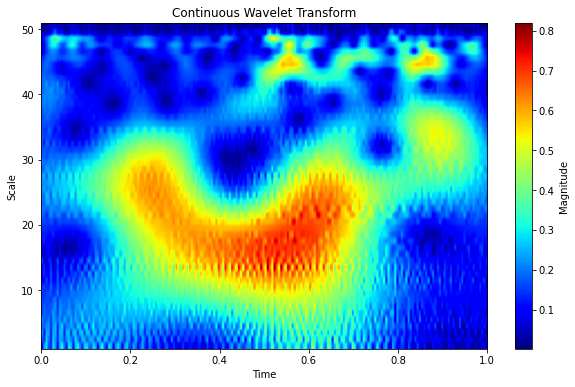

gaus1


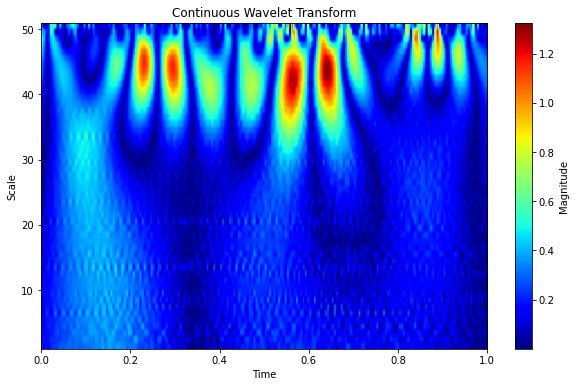

morl


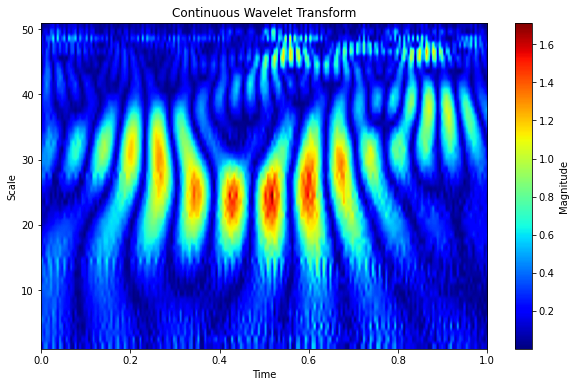

mexh


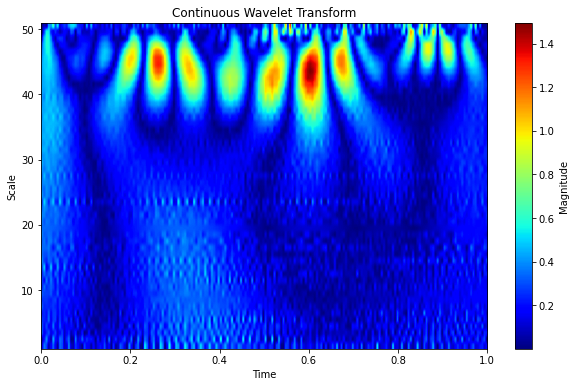

In [ ]:
scales = np.arange(1, Utils.Scales)
import pywt
for wavelet in reversed(Utils.wavelet_lis):
    # Perform Continuous Wavelet Transform
    print(wavelet)
    coefficients, frequencies = pywt.cwt(Dataloader.X_numpy[1,:Utils.input_horizon], scales, wavelet)

    # # Plot the results
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coefficients), extent=[0, 1, 1, Utils.Scales], aspect='auto', cmap='jet')
    plt.colorbar(label='Magnitude')
    plt.title('Continuous Wavelet Transform')
    plt.xlabel('Time')
    plt.ylabel('Scale')
    plt.show()

if Utils.Coefficient_Real:
    coefficients = np.abs(coefficients)

In [ ]:
prediction_input_size   = Utils.input_horizon
epochs                  = Utils.num_epochs

model     = Model.Structure().to(device = Utils.Device)
criterion = torch.nn.CrossEntropyLoss(label_smoothing = 0.3)
optimizer = torch.optim.Adam(
                            model.parameters(),
                            lr=1e-5,
                            # momentum=0.9,
                            # weight_decay=1e-2
                            )

NameError: name 'Utils' is not defined

In [ ]:
loss_t = []

ll = (Dataloader.X_numpy.shape[1]//prediction_input_size)-1
for epoch in range(1,epochs):
    print(ll)

    for test in [0,1,3,6,14,17,21]:#range(Dataloader.X_numpy.shape[0]):
        loop_train = tqdm.tqdm(range(ll),total=ll,desc="train",position=0,leave=True)
        loss_train_list = []


        j = 0
        accu = 0
        for Batch in loop_train:
            optimizer.zero_grad()
            
            x = Dataloader.X_numpy[test,Batch*prediction_input_size:(Batch+1)*prediction_input_size]
            y = Dataloader.Y_numpy[test,Batch*prediction_input_size: Batch*prediction_input_size+1]
            x = (x-x.mean())/x.std()
            prediction = model.forward(x)

            if torch.argmax(prediction).item() == y:
                accu +=1
            j += 1    

            
            if y==0:
                y = np.array([1,0])
            else:
                y = np.array([0,1])




            loss_train = criterion(prediction, torch.tensor(y.reshape(1,2),dtype=torch.float32).to(device=Utils.Device))
            # Back propagation
            loss_train.backward()
            # Update model parameters
            optimizer.step()
            loss_train_list.append(loss_train)
            
            if Batch%10 == 0:
                # print(loss_train)
                loop_train.set_description(f"{epoch=}- Test : {test} {y=}")
                loop_train.set_postfix(
                    loss_batch="{:.7f}".format(torch.tensor(loss_train_list).mean()),
                    Accu ="{:.5f}".format(100*accu/j),refresh=True, )
                    
        loss_t.append(torch.tensor(loss_train_list).mean())

NameError: name 'Dataloader' is not defined

In [ ]:
[0,1,3,6,14,17,21]

(tensor([[ 0.7916, -0.5145]], device='cuda:0', grad_fn=<AddmmBackward0>),
 array([1, 0]))